In [1]:
# dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from datetime import datetime

In [2]:
# create random latitude and longitude combos
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-54.271194041194676, 135.33838882968877),
 (82.6592239884443, 99.31508016207397),
 (45.41629622878048, -3.72389013387658),
 (49.90058391012093, 152.50835092787798),
 (31.87661076602754, -160.68713845715325),
 (85.7947728355031, 64.72247524210417),
 (-16.2520350765908, -122.23069399628407),
 (70.36933771025133, -10.375875918790712),
 (34.815466005380685, 116.53849435834445),
 (-15.205781130310285, -99.49100096608632),
 (-6.022698563269913, 145.45903371456632),
 (60.68184798214952, -74.96700997310734),
 (34.13394301213239, 80.17995275799996),
 (-89.85848571206822, 84.46473382956191),
 (-46.97636580614895, 129.78669686509755),
 (25.07608334132749, 14.233331882073628),
 (22.676373090445736, 85.44544733795004),
 (66.74704463690591, 9.918908129053023),
 (-35.631680771098225, -57.43468573529023),
 (10.36753519498204, 168.41361230096499),
 (-15.92316370112627, -79.09709867836328),
 (-65.77353829144968, 152.62562475234967),
 (13.829865592844897, 16.45710870522285),
 (-66.10791943110453, -44.6

In [4]:
len(coordinates)

1500

In [5]:
# create list to hold city names
cities = []

In [6]:
# identify nearest city to set of coordinates
notIn = 0
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # if city is unique (not in the list) then append to list
    if city not in cities:
        notIn+=1
        cities.append(city)
    
# print to confirm number of cities
print(len(cities))
print(notIn)


630
630


In [7]:
cities

['new norfolk',
 'khatanga',
 'santander',
 'severo-kurilsk',
 'kapaa',
 'amderma',
 'rikitea',
 'hofn',
 'fengxian',
 'puerto ayora',
 'goroka',
 'iqaluit',
 'leh',
 'busselton',
 'port lincoln',
 'marzuq',
 'chakradharpur',
 'rorvik',
 'dolores',
 'butaritari',
 'pisco',
 'hobart',
 'moussoro',
 'ushuaia',
 'aitape',
 'atuona',
 'biograd na moru',
 'vaini',
 'puerto carreno',
 'burkhala',
 'punta arenas',
 'comodoro rivadavia',
 'rocha',
 'nha trang',
 'tura',
 'barrow',
 'luderitz',
 'carnarvon',
 'saint-philippe',
 'arroio grande',
 'port alfred',
 'portland',
 'nizhneyansk',
 'esperance',
 'albany',
 'bluff',
 'tumarbong',
 'bethel',
 'port elizabeth',
 'cape town',
 'korla',
 'boyolangu',
 'dudinka',
 'mount isa',
 'thompson',
 'lata',
 'navabad',
 'bredasdorp',
 'skibbereen',
 'tanete',
 'saskylakh',
 'avarua',
 'manta',
 'cap-aux-meules',
 'tongren',
 'tikhmenevo',
 'chokurdakh',
 'tunduru',
 'buala',
 'bambous virieux',
 'taolanaro',
 'yellowknife',
 'tres palos',
 'cabo san l

In [8]:
print(len(cities))

630


In [9]:
# import requests library
import requests

# import the API key
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f26aca23ff8f04b887ddbf6955e8db29


In [11]:
# empty list to hold the weather data
city_data = []
# print beginning of the logging
print("Beginning data retrieval        ")
print("--------------------------------")

# create counters
record_count = 1
set_count = 1


Beginning data retrieval        
--------------------------------


In [12]:
# iterate through the items in cities list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
  

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | santander
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | fengxian
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | goroka
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | leh
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | marzuq
Processing Record 17 of Set 1 | chakradharpur
Processing Record 18 of Set 1 | rorvik
Processing Record 19 of Set 1 | dolores
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | moussoro
Processing Record 24 of Set 1 | ushuaia

Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | carballo
Processing Record 40 of Set 4 | praia da vitoria
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | tromso
Processing Record 43 of Set 4 | hay river
Processing Record 44 of Set 4 | sidi ali
Processing Record 45 of Set 4 | riyadh
Processing Record 46 of Set 4 | yershov
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | arawa
Processing Record 50 of Set 4 | soyo
Processing Record 1 of Set 5 | nikolskoye
Processing Record 2 of Set 5 | skjervoy
Processing Record 3 of Set 5 | suarez
Processing Record 4 of Set 5 | lithgow
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | zhicheng
Processing Record 7 of Set 5 | douentza
Processing Record 8 of Set 5 | ola
Processing Record 9 of Set 5 | broken hill
Processing Record 10 of Set 5 | masuguru
Processing Record 11 of Set 5 | vallenar
Processing Record

Processing Record 22 of Set 8 | saldanha
Processing Record 23 of Set 8 | havre-saint-pierre
Processing Record 24 of Set 8 | hanzhong
Processing Record 25 of Set 8 | pitimbu
Processing Record 26 of Set 8 | marystown
Processing Record 27 of Set 8 | drayton valley
Processing Record 28 of Set 8 | mahebourg
Processing Record 29 of Set 8 | asfi
Processing Record 30 of Set 8 | singida
Processing Record 31 of Set 8 | oyem
Processing Record 32 of Set 8 | sao jose da coroa grande
Processing Record 33 of Set 8 | cuamba
Processing Record 34 of Set 8 | camacha
Processing Record 35 of Set 8 | lagos
Processing Record 36 of Set 8 | almaznyy
Processing Record 37 of Set 8 | willmar
Processing Record 38 of Set 8 | yumen
Processing Record 39 of Set 8 | labuhan
Processing Record 40 of Set 8 | cucutilla
Processing Record 41 of Set 8 | serov
Processing Record 42 of Set 8 | san bartolo
Processing Record 43 of Set 8 | shelburne
Processing Record 44 of Set 8 | skuodas
Processing Record 45 of Set 8 | brae
Proces

Processing Record 12 of Set 12 | arauca
Processing Record 13 of Set 12 | dodge city
Processing Record 14 of Set 12 | kondinskoye
Processing Record 15 of Set 12 | ardakan
Processing Record 16 of Set 12 | talara
Processing Record 17 of Set 12 | sirajganj
Processing Record 18 of Set 12 | utiroa
City not found. Skipping...
Processing Record 19 of Set 12 | cape coast
Processing Record 20 of Set 12 | igarka
Processing Record 21 of Set 12 | glenwood springs
Processing Record 22 of Set 12 | semnan
Processing Record 23 of Set 12 | usinsk
Processing Record 24 of Set 12 | casper
Processing Record 25 of Set 12 | neiafu
Processing Record 26 of Set 12 | durazno
Processing Record 27 of Set 12 | keuruu
Processing Record 28 of Set 12 | agadez
Processing Record 29 of Set 12 | pierre
Processing Record 30 of Set 12 | kralendijk
Processing Record 31 of Set 12 | vuktyl
Processing Record 32 of Set 12 | mayo
Processing Record 33 of Set 12 | conakry
Processing Record 34 of Set 12 | broome
Processing Record 35 

In [13]:
len(city_data)

573

In [14]:
city_data

[{'City': 'New Norfolk',
  'Lat': -42.78,
  'Lng': 147.06,
  'Max Temp': 42.01,
  'Humidity': 91,
  'Cloudiness': 74,
  'Wind Speed': 2.44,
  'Country': 'AU',
  'Date': '2020-08-17 21:57:50'},
 {'City': 'Khatanga',
  'Lat': 71.97,
  'Lng': 102.5,
  'Max Temp': 58.89,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 6.71,
  'Country': 'RU',
  'Date': '2020-08-17 21:54:22'},
 {'City': 'Santander',
  'Lat': 43.46,
  'Lng': -3.8,
  'Max Temp': 69.01,
  'Humidity': 82,
  'Cloudiness': 100,
  'Wind Speed': 4.7,
  'Country': 'ES',
  'Date': '2020-08-17 21:59:13'},
 {'City': 'Severo-Kurilsk',
  'Lat': 50.68,
  'Lng': 156.12,
  'Max Temp': 52.36,
  'Humidity': 88,
  'Cloudiness': 89,
  'Wind Speed': 1.74,
  'Country': 'RU',
  'Date': '2020-08-17 21:59:14'},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 84.2,
  'Humidity': 62,
  'Cloudiness': 20,
  'Wind Speed': 14.99,
  'Country': 'US',
  'Date': '2020-08-17 21:59:14'},
 {'City': 'Rikitea',
  'Lat': -23.12,
  'Lng': -

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,42.01,91,74,2.44,AU,2020-08-17 21:57:50
1,Khatanga,71.97,102.50,58.89,88,100,6.71,RU,2020-08-17 21:54:22
2,Santander,43.46,-3.80,69.01,82,100,4.70,ES,2020-08-17 21:59:13
3,Severo-Kurilsk,50.68,156.12,52.36,88,89,1.74,RU,2020-08-17 21:59:14
4,Kapaa,22.08,-159.32,84.20,62,20,14.99,US,2020-08-17 21:59:14
5,Rikitea,-23.12,-134.97,71.49,76,23,9.15,PF,2020-08-17 21:59:14
6,Hofn,64.25,-15.21,53.20,90,28,4.34,IS,2020-08-17 21:59:14
7,Fengxian,34.70,116.59,78.67,91,0,5.91,CN,2020-08-17 21:59:15
8,Puerto Ayora,-0.74,-90.35,73.40,73,40,20.80,EC,2020-08-17 21:59:15
9,Goroka,-6.08,145.39,63.64,83,52,0.40,PG,2020-08-17 21:59:15


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]                 

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2020-08-17 21:57:50,-42.78,147.06,42.01,91,74,2.44
1,Khatanga,RU,2020-08-17 21:54:22,71.97,102.50,58.89,88,100,6.71
2,Santander,ES,2020-08-17 21:59:13,43.46,-3.80,69.01,82,100,4.70
3,Severo-Kurilsk,RU,2020-08-17 21:59:14,50.68,156.12,52.36,88,89,1.74
4,Kapaa,US,2020-08-17 21:59:14,22.08,-159.32,84.20,62,20,14.99
...,...,...,...,...,...,...,...,...,...
568,Erzin,TR,2020-08-17 22:02:13,36.96,36.20,81.00,83,0,0.58
569,Kresttsy,RU,2020-08-17 22:02:13,58.25,32.52,49.19,75,0,1.92
570,Alexandria,EG,2020-08-17 21:57:53,31.22,29.96,80.60,74,40,13.87
571,Kouroussa,GN,2020-08-17 22:02:13,10.65,-9.88,74.84,93,44,4.18


In [18]:
# create csv file
output_data_file = "weather_data/cities.csv"

# export the csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# obtain data for scatter plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# import the time module
import time
# get todays date in seconds
today = time.strftime("%x")
today

'08/17/20'

<function matplotlib.pyplot.show(*args, **kw)>

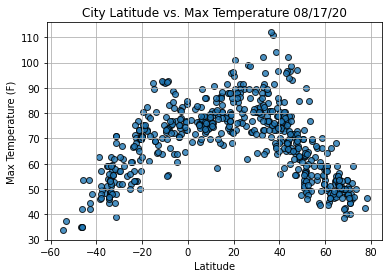

In [20]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

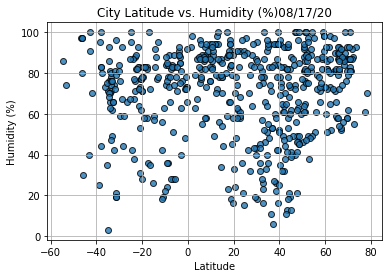

In [21]:
# scatter plot for latitude and humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Humidity (%)"+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

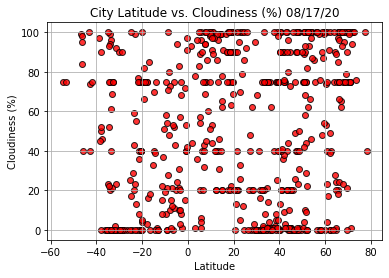

In [22]:
# scatter plot latitude and cloudiness
plt.scatter(lats, cloudiness, color="red", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

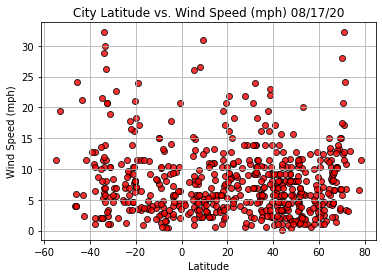

In [75]:
# scatter plot latitude and wind speed
plt.scatter(lats, wind_speed, color="red", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig55.png")
plt.show

In [24]:
from scipy.stats import linregress

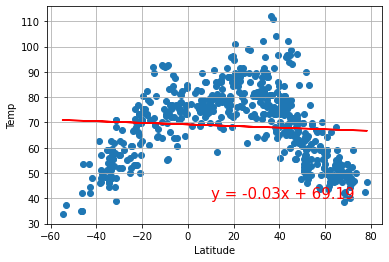

In [27]:
# Perform linear regression latitude and max temp
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.grid(True)
plt.show()

In [51]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [52]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Khatanga,RU,2020-08-17 21:54:22,71.97,102.50,58.89,88,100,6.71
2,Santander,ES,2020-08-17 21:59:13,43.46,-3.80,69.01,82,100,4.70
3,Severo-Kurilsk,RU,2020-08-17 21:59:14,50.68,156.12,52.36,88,89,1.74
4,Kapaa,US,2020-08-17 21:59:14,22.08,-159.32,84.20,62,20,14.99
6,Hofn,IS,2020-08-17 21:59:14,64.25,-15.21,53.20,90,28,4.34


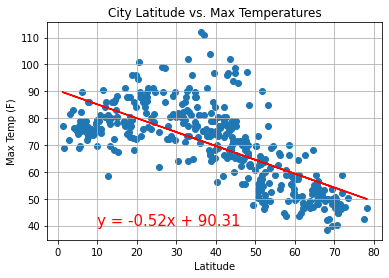

In [53]:
# linear regression on the northern hemisphere temperatures using a def function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values, "Northern Latitudes vs. Max Temperatures", "Max Temp (F)", (10,40))

-0.07249567807985509


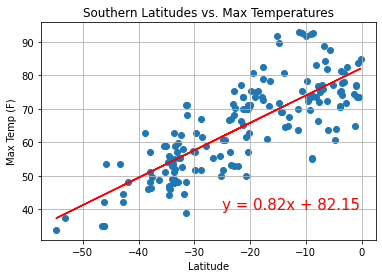

In [58]:
# linear regression on the southern hemisphere temperatures using a def function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
print(r_value)
# call function
plot_linear_regression(x_values, y_values, "Southern Latitudes vs. Max Temperatures", "Max Temp (F)", (-25,40))

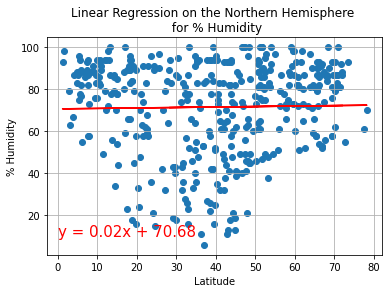

In [61]:
# Linear regression on the Northern Hemisphere and humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(00,10))

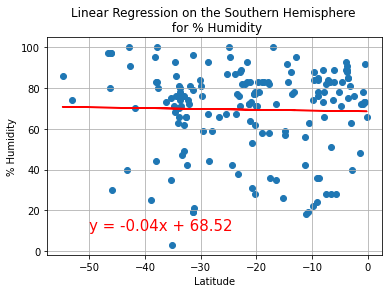

In [63]:
# Linear regression on the Southern Hemisphere and humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,10))

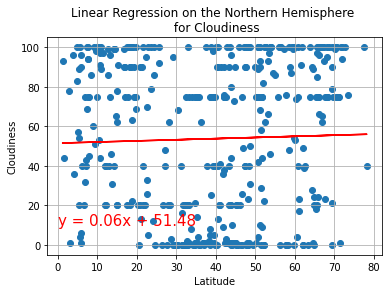

In [65]:
# Linear regression on the Northern Hemisphere and cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Cloudiness", 'Cloudiness',(00,10))

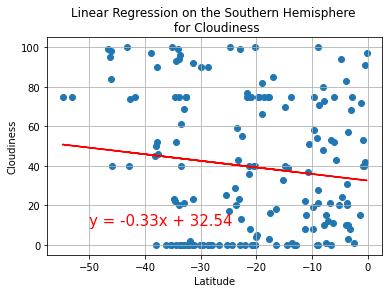

In [70]:
# Linear regression on the Southern Hemisphere and cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Cloudiness", 'Cloudiness',(-50,10))

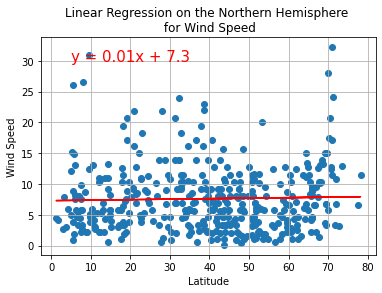

In [71]:
# Linear regression on the Northern Hemisphere and wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Wind Speed", 'Wind Speed',(5,30))

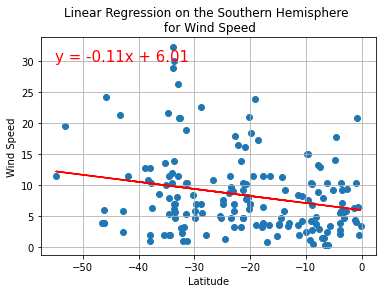

In [73]:
# Linear regression on the Southern Hemisphere and wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Wind Speed", 'Wind Speed',(-55,30))